<a href="https://colab.research.google.com/github/HO94/InsightMining_study/blob/main/04_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_Input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
print(fish_Input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish[['Weight','Length']].to_numpy()[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
fish[['Weight','Length']]

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
...,...,...
154,12.2,12.2
155,13.4,12.4
156,12.2,13.0
157,19.7,14.3


In [ ]:
fish_target = fish['Species'].to_numpy()  # 왜 넘파이로 바꾸는지
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_Input, fish_target, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
train_input[:5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944]])

In [ ]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target)
print(indexes)

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']
[[104 115 106]]


로지스틱 회귀

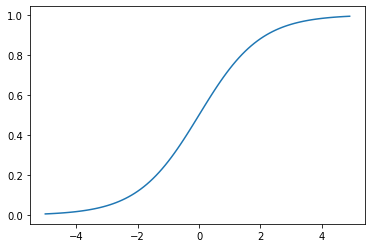

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [ ]:
train_scaled[bream_smelt_indexes]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
train_bream_smelt[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174]])

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
print(lr.coef_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
lr = LogisticRegression(C = 20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
lr.coef_

array([[-1.49002872, -1.02918727,  2.59350663,  7.70354602, -1.20068248],
       [ 0.19619159, -2.01061244, -3.77982242,  6.50490234, -1.99486186],
       [ 3.56278587,  6.34361096, -8.48973195, -5.75756378,  3.79308915],
       [-0.10458459,  3.60316876,  3.9306745 , -3.61731612, -1.7507051 ],
       [-1.40059312, -6.07505122,  5.2596788 , -0.87222704,  1.86043634],
       [-1.38528404,  1.49217179,  1.39228237, -5.67732743, -4.40095987],
       [ 0.62151302, -2.32410058, -0.90658793,  1.71598602,  3.69368381]])

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
